<a href="https://colab.research.google.com/github/jokefun022/Google-Colab/blob/main/classification_Report_Confusion_Matrix_NLP_Project_28_05_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # To read dataset in dataframe style
import numpy as np # To perform mathematical computations
import tensorflow as tf # To Implement Neural Networks
import re # Regular Expression
import matplotlib.pyplot as plt # For Visualization
import seaborn as sns # For visualization
from bs4 import BeautifulSoup # To remove html tags
import unicodedata # To remove accented characters
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
 # df = pd.read_csv('/content/Multi_Labeled_Data.csv',usecols=['Tweet_Text','Label','Emoji'], index_col=False)

##############################################################################################################################

df = pd.read_csv('/content/emoji_code.csv',usecols=['id','class','name','unified','docomo','kddi','softbank','google'], index_col=False)

In [ ]:
df.head(11000)

,id,class,name,unified,docomo,kddi,softbank,google
0,1,emoji2600,black sun with rays,U+2600,U+E63E,U+E488,U+E04A,U+FE000
1,2,emoji2601,cloud,U+2601,U+E63F,U+E48D,U+E049,U+FE001
2,3,emoji2614,umbrella with rain drops,U+2614,U+E640,U+E48C,U+E04B,U+FE002
3,4,emoji26c4,snowman without snow,U+26C4,U+E641,U+E485,U+E048,U+FE003
4,5,emoji26a1,high voltage sign,U+26A1,U+E642,U+E487,U+E13D,U+FE004
...,...,...,...,...,...,...,...,...
715,716,emoji1f44b,waving hand sign,U+1F44B,U+E695,U+EAD6,U+E41E,U+FEB9D
716,717,emoji1f44f,clapping hands sign,U+1F44F,-,U+EAD3,U+E41F,U+FEB9E
717,718,emoji1f44c,ok hand sign,U+1F44C,U+E70B,U+EAD4,U+E420,U+FEB9F
718,719,emoji1f44e,thumbs down sign,U+1F44E,U+E700,U+EAD5,U+E421,U+FEBA0


In [ ]:
df.tail(11000)

,id,class,name,unified,docomo,kddi,softbank,google
0,1,emoji2600,black sun with rays,U+2600,U+E63E,U+E488,U+E04A,U+FE000
1,2,emoji2601,cloud,U+2601,U+E63F,U+E48D,U+E049,U+FE001
2,3,emoji2614,umbrella with rain drops,U+2614,U+E640,U+E48C,U+E04B,U+FE002
3,4,emoji26c4,snowman without snow,U+26C4,U+E641,U+E485,U+E048,U+FE003
4,5,emoji26a1,high voltage sign,U+26A1,U+E642,U+E487,U+E13D,U+FE004
...,...,...,...,...,...,...,...,...
715,716,emoji1f44b,waving hand sign,U+1F44B,U+E695,U+EAD6,U+E41E,U+FEB9D
716,717,emoji1f44f,clapping hands sign,U+1F44F,-,U+EAD3,U+E41F,U+FEB9E
717,718,emoji1f44c,ok hand sign,U+1F44C,U+E70B,U+EAD4,U+E420,U+FEB9F
718,719,emoji1f44e,thumbs down sign,U+1F44E,U+E700,U+EAD5,U+E421,U+FEBA0


In [ ]:

def get_wordcounts(x):
  # This function inputs a string
  # Returns the length of the string
	length = len(str(x).split())
	return length

In [ ]:

def get_charcounts(x):
  # This function inputs a string
  # Returns the character count in the string
	s = x.split()
	x = ''.join(s)
	return len(x)

In [ ]:

def get_avg_wordlength(x):
  # This function inputs a string
  # Returns the Average words lenght
  # formulae is total character in a string / total words
	count = get_charcounts(x)/get_wordcounts(x)
	return count

In [ ]:

def get_hashtag_counts(x):
  # This function input a string
  # And returns the total hashtags in the string
  # Because our data is mostly focused on tweets
  # So for EDA it is important to know the hasttag counts
	l = len([t for t in x.split() if t.startswith('#')])
	return l


In [ ]:


def get_mentions_counts(x):
  # This function inputs a string
  # Returns the mention to other users in the tweet
	l = len([t for t in x.split() if t.startswith('@')])
	return l


In [ ]:

def get_digit_counts(x):
  # This function inputs a string
  # Return the digits in a string
  # important in EDA to know if the tweets contain
  # numbers like phone numbers etc.
	digits = re.findall(r'[0-9,.]+', x)
	return len(digits)

In [ ]:
# Ensure necessary downloads
import nltk
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('taggers/averaged_perceptron_tagger')
except LookupError:
    nltk.download('averaged_perceptron_tagger')
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
# Explicitly download the English tagger if not found
try:
    nltk.data.find('taggers/averaged_perceptron_tagger_eng')
except LookupError:
    nltk.download('averaged_perceptron_tagger_eng')


# Install necessary libraries
!pip install emoji
!pip install langdetect
!pip install textblob

import re
import string
import emoji
import langdetect # Import the langdetect library
from textblob import TextBlob # Import TextBlob
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize # Import pos_tag and word_tokenize after downloads


stop_words = set(stopwords.words('english'))

def get_advanced_features(df, col):
    df['uppercase_counts'] = df[col].apply(lambda x: sum(1 for c in str(x) if c.isupper()))
    df['lowercase_counts'] = df[col].apply(lambda x: sum(1 for c in str(x) if c.islower()))
    df['punctuation_counts'] = df[col].apply(lambda x: sum(1 for c in str(x) if c in string.punctuation))
    df['stopword_counts'] = df[col].apply(lambda x: sum(1 for w in word_tokenize(str(x)) if w.lower() in stop_words))
    df['unique_word_counts'] = df[col].apply(lambda x: len(set(word_tokenize(str(x)))))
    df['longest_word_length'] = df[col].apply(lambda x: max((len(w) for w in word_tokenize(str(x))), default=0))
    df['shortest_word_length'] = df[col].apply(lambda x: min((len(w) for w in word_tokenize(str(x)) if w.isalpha()), default=0))
    df['emoji_counts'] = df[col].apply(lambda x: len([c for c in str(x) if c in emoji.EMOJI_DATA]))
    df['space_counts'] = df[col].apply(lambda x: str(x).count(' '))
    df['url_counts'] = df[col].apply(lambda x: len(re.findall(r'http[s]?://\S+', str(x))))
    df['special_char_counts'] = df[col].apply(lambda x: len(re.findall(r'[@#%&$]', str(x))))
    df['repeated_char_counts'] = df[col].apply(lambda x: len(re.findall(r'(.)\1{2,}', str(x))))
    df['exclamation_counts'] = df[col].apply(lambda x: str(x).count('!'))
    df['question_counts'] = df[col].apply(lambda x: str(x).count('?'))
    df['contains_email'] = df[col].apply(lambda x: bool(re.search(r'\b[\w\.-]+@[\w\.-]+\.\w{2,4}\b', str(x))))
    df['contains_phone'] = df[col].apply(lambda x: bool(re.search(r'\b\d{3}[-.\s]??\d{3}[-.\s]??\d{4}\b', str(x))))
    df['contains_year'] = df[col].apply(lambda x: bool(re.search(r'\b(19|20)\d{2}\b', str(x))))
    df['is_only_emoji'] = df[col].apply(lambda x: all(c in emoji.EMOJI_DATA for c in str(x).strip()) if str(x).strip() else False)
    df['is_alphanumeric'] = df[col].apply(lambda x: str(x).isalnum())
    df['sentiment_score'] = df[col].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    df['subjectivity_score'] = df[col].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)
    df['language_detected'] = df[col].apply(lambda x: langdetect.detect(str(x)) if str(x).strip() else 'unknown')
    df['contains_negation'] = df[col].apply(lambda x: any(neg in str(x).lower() for neg in ['not', 'no', "n't", 'never']))
    # Ensure pos_tag and word_tokenize are correctly imported and used here
    df['nouns_count'] = df[col].apply(lambda x: sum(1 for word, tag in pos_tag(word_tokenize(str(x))) if tag.startswith('NN')))
    df['verbs_count'] = df[col].apply(lambda x: sum(1 for word, tag in pos_tag(word_tokenize(str(x))) if tag.startswith('VB')))
    return df

def get_basic_features(df,col):
  df['char_counts'] = df[col].apply(lambda x: get_charcounts(x))
  df['word_counts'] = df[col].apply(lambda x: get_wordcounts(x))
  df['avg_wordlength'] = df[col].apply(lambda x: get_avg_wordlength(x))
  df['hashtag_counts'] = df[col].apply(lambda x: get_hashtag_counts(x))
  df['mentions_counts'] = df[col].apply(lambda x: get_mentions_counts(x))
  df['digits_counts'] = df[col].apply(lambda x: get_digit_counts(x))
  return df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 37.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=bf334f4f12c17d0ee741f4e053e9bca54ce12f49cad5fbfe59fcc4756d16dd5c
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


Data Cleaning
Remove emails

In [ ]:

def remove_emails(x):
	return re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x)

def remove_urls(x):
	return re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x)

def remove_html_tags(x):
	return BeautifulSoup(x, 'lxml').get_text().strip()

def remove_rt(x):
	return re.sub(r'\brt\b', '', x).strip()

def remove_accented_chars(x):
	x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
	return x

def remove_special_chars(x):
	x = re.sub(r'[^\w ]+', "", x)
	x = ' '.join(x.split())
	return x

def remove_emails(x):
	return re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x)

def remove_urls(x):
	return re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x)

def remove_html_tags(x):
	return BeautifulSoup(x, 'lxml').get_text().strip()

def remove_rt(x):
	return re.sub(r'\brt\b', '', x).strip()

def remove_accented_chars(x):
	x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
	return x

def remove_special_chars(x):
	x = re.sub(r'[^\w ]+', "", x)
	x = ' '.join(x.split())
	return x

def get_clean(x):
    x = str(x).lower().replace('\'', '').replace('_', ' ')
    x = remove_emails(x)
    x = remove_urls(x)
    x = remove_html_tags(x)
    x = remove_rt(x)
    x = remove_accented_chars(x)
    x = remove_special_chars(x)
    x = re.sub("(.)\1{2,}", "\1", x)
    return x
    x = remove_urls(x)
    x = remove_html_tags(x)
    x = remove_rt(x)
    x = remove_accented_chars(x)
    x = remove_special_chars(x)
    x = re.sub("(.)\1{2,}", "\1", x)
    return x

Exploratory Data Analysis

In [ ]:
import nltk
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
#df = get_advanced_features(df, 'Tweet_Text')  # Use the correct column name 'Tweet_Text'

##################################################################################################

#df = pd.read_csv('/content/Multi_Labeled_Data.csv',usecols=['Tweet_Text','Label','Emoji'], index_col=False)

# Remove 'sodtb_unicode' from the usecols list as it was not found in the CSV
# If you intend to work with tweet data, load the correct CSV and include 'Tweet_Text'
try:
    # Attempt to load the dataset you seem to have intended for text analysis

    df = pd.read_csv('/content/Multi_Labeled_Data.csv', usecols=['Tweet_Text','Label','Emoji'], index_col=False)
except FileNotFoundError:
    # Fallback to the emoji dataset if the Multi_Labeled_Data.csv is not found
    # If you proceed with the emoji dataset, you will need to adjust subsequent code
    # that expects a 'Tweet_Text' column.

    print("Warning: '/content/Multi_Labeled_Data.csv' not found. Loading '/content/emoji_code.csv' instead.")
# df = pd.read_csv('/content/emoji_code.csv',usecols=['id','class','name','unified','docomo','kddi','softbank','google'], index_col=False)

# If df was loaded from emoji_code.csv, the following lines that use 'Tweet_Text' will still fail.
# You need to decide which dataset you are working with and adjust accordingly.
# If working with emoji_code.csv, you might apply features to columns like 'name' or 'class'
# or skip the tweet-specific feature extraction entirely.

# %%
# df.head(11000)
# %%
# df.tail(11000)

In [ ]:
df_for_eda = get_basic_features(df,col='Tweet_Text')

In [ ]:
df_for_eda.head(110000)

,Tweet_Text,Label,Emoji,char_counts,word_counts,avg_wordlength,hashtag_counts,mentions_counts,digits_counts
0,kah kay yih sach hai,0,U+1F600,16,5,3.200000,0,0,0
1,neither bhadwaa tantra rather madarjaat log sh...,0,U+1F600,83,15,5.533333,0,0,0
2,kyoon okay yih kuchh logo ki fitrat hai,0,U+1F600,32,8,4.000000,0,0,0
3,lagta hsi man chaaha job naey day rahay bhaai ko,0,U+1F600,39,10,3.900000,0,0,0
4,achchha na bataao mujhay pata hai,0,U+1F600,28,6,4.666667,0,0,0
...,...,...,...,...,...,...,...,...,...
10667,hope sort male society discrimination mullah h...,4,NaN,111,18,6.166667,0,0,0
10668,ahmadiya are also citizen without right,4,NaN,34,6,5.666667,0,0,0
10669,dear marathon relation discussion ahmedis know...,4,NaN,173,28,6.178571,0,0,0
10670,halala ki paedaaish andha hai buddddhay dikh n...,4,NaN,75,17,4.411765,0,0,0


In [ ]:
# To plot using matplotlib
# Let us define some parameters
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['figure.dpi'] = 120

Target Class Distribution

In [ ]:
df_for_eda['Label'].value_counts()

,count
Label,
0,6055
2,3141
1,725
3,398
4,353


<ipython-input-23-9c75c0b5d434>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df_for_eda, palette=['green', 'blue', 'purple', 'yellow'])
<ipython-input-23-9c75c0b5d434>:10: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Label', data=df_for_eda, palette=['green', 'blue', 'purple', 'yellow'])


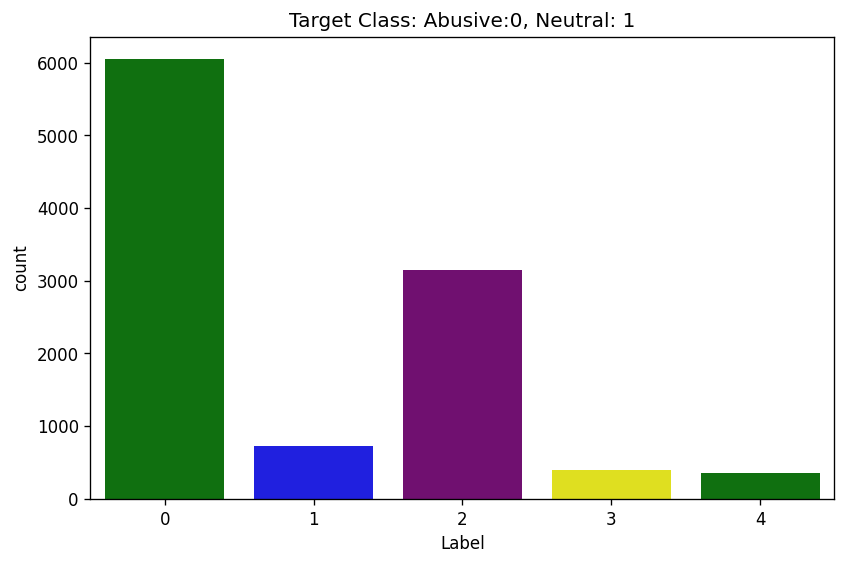

In [ ]:
# To plot using matplotlib
# Let us define some parameters
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['figure.dpi'] = 120

# Target Class Distribution
df_for_eda['Label'].value_counts()

# Plot the countplot with custom colors
sns.countplot(x='Label', data=df_for_eda, palette=['green', 'blue', 'purple', 'yellow'])
plt.title('Target Class: Abusive:0, Neutral: 1')
plt.show()

<Axes: ylabel='count'>

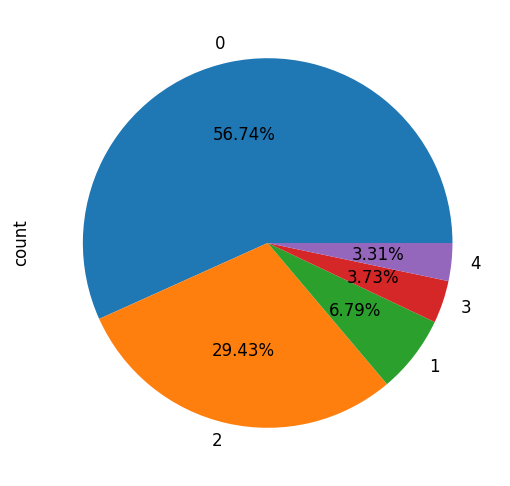

In [ ]:
df_for_eda['Label'].value_counts().plot.pie(autopct='%1.2f%%')

In [ ]:
df_for_eda['char_counts'].max()

273

In [ ]:
df_for_eda['char_counts'].min()

4

In [ ]:
df_for_eda['char_counts'].mean()

np.float64(69.60148050974513)

<ipython-input-28-61f4f91bc5a9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_for_eda['char_counts'])


<Axes: xlabel='char_counts', ylabel='Density'>

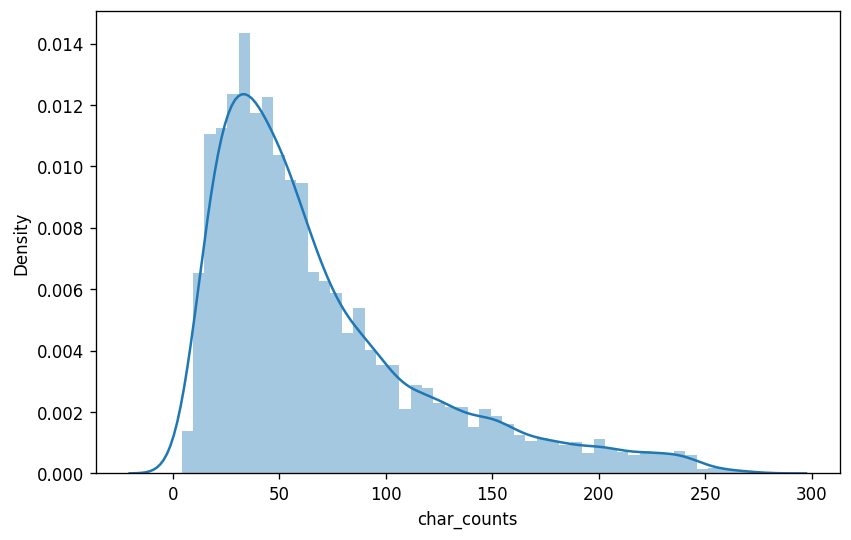

In [ ]:
sns.distplot(df_for_eda['char_counts'])

Kernel density plot

<ipython-input-29-ff324b3611a6>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_for_eda['char_counts'],shade=True)


<Axes: xlabel='char_counts', ylabel='Density'>

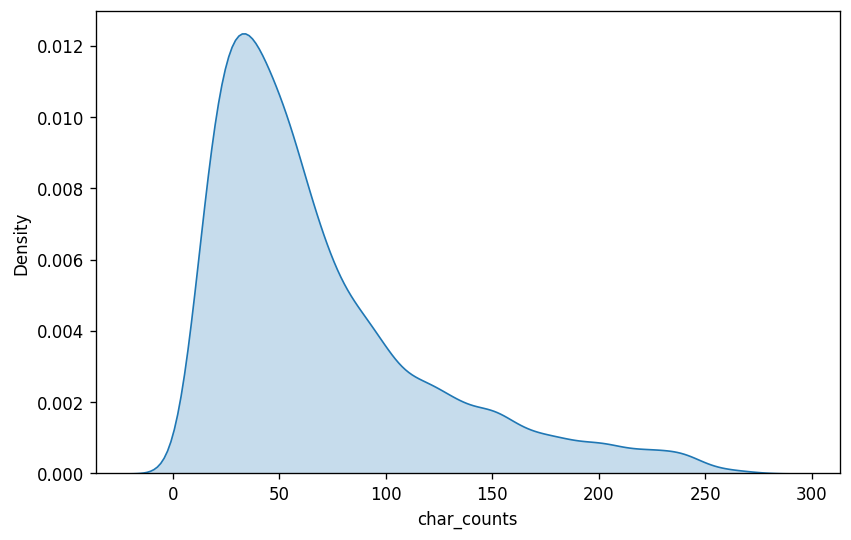

In [ ]:
sns.kdeplot(df_for_eda['char_counts'],shade=True)

Characters Distribution according to Label

<ipython-input-30-c811530e8bfa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_for_eda[df_for_eda['Label']==1]['char_counts'],label='Neutral')
<ipython-input-30-c811530e8bfa>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_for_eda[df_for_eda['Label']==0]['char_counts'],label='Abusive/of

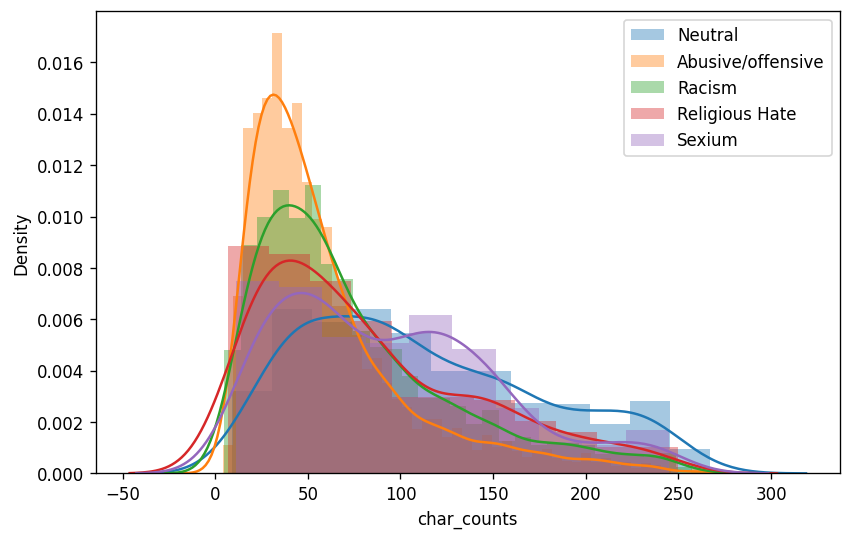

In [ ]:

sns.distplot(df_for_eda[df_for_eda['Label']==1]['char_counts'],label='Neutral')
sns.distplot(df_for_eda[df_for_eda['Label']==0]['char_counts'],label='Abusive/offensive')
sns.distplot(df_for_eda[df_for_eda['Label']==2]['char_counts'],label='Racism')
sns.distplot(df_for_eda[df_for_eda['Label']==3]['char_counts'],label='Religious Hate')
sns.distplot(df_for_eda[df_for_eda['Label']==4]['char_counts'],label='Sexium')

plt.legend()
plt.show()

Violin plot according to target class

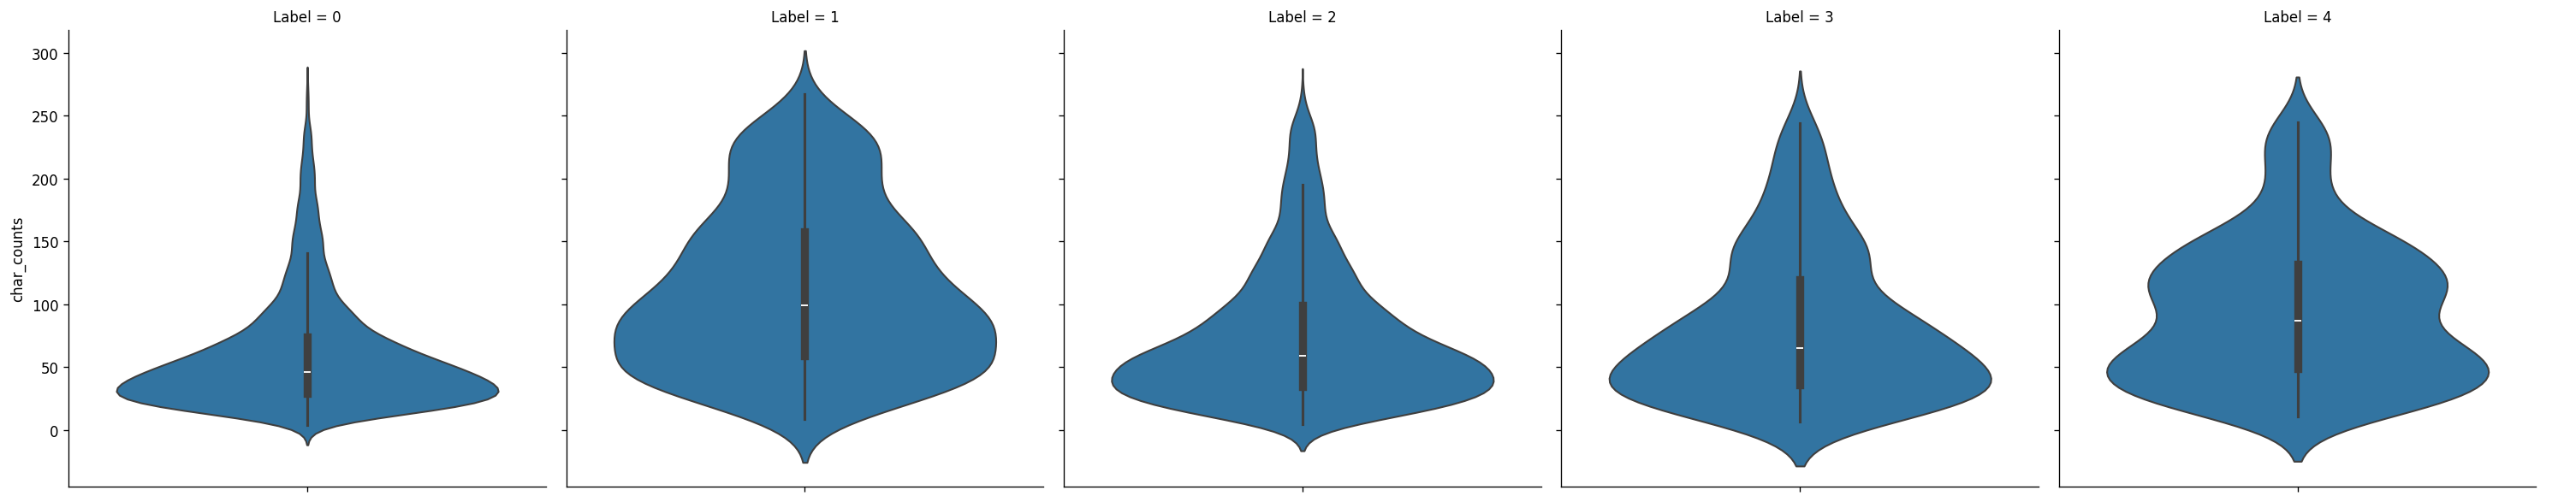

In [ ]:
sns.catplot(y='char_counts',data=df_for_eda,kind='violin',col='Label')

Number of Words Distribution

In [ ]:
df_for_eda.columns

Index(['Tweet_Text', 'Label', 'Emoji', 'char_counts', 'word_counts',
       'avg_wordlength', 'hashtag_counts', 'mentions_counts', 'digits_counts'],
      dtype='object')

Kernel distribution plot for total word counts in tweets

In [ ]:
print(f"Longest tweet consist on {df_for_eda['word_counts'].max()} words")

Longest tweet consist on 64 words


In [ ]:
print(f"Shortest tweet consist on {df_for_eda['word_counts'].min()} words")


Shortest tweet consist on 1 words


In [ ]:
print(f"Average tweet Length {df_for_eda['word_counts'].mean()} words")

Average tweet Length 15.190967016491754 words


<ipython-input-36-c6a841bba6c4>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_for_eda[df_for_eda['Label']==1]['word_counts'],label='Neutral',shade=True)
<ipython-input-36-c6a841bba6c4>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_for_eda[df_for_eda['Label']==0]['word_counts'],label='Abusive/offensive',shade=True)
<ipython-input-36-c6a841bba6c4>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_for_eda[df_for_eda['Label']==2]['word_counts'],label='Racism',shade=True)
<ipython-input-36-c6a841bba6c4>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an err

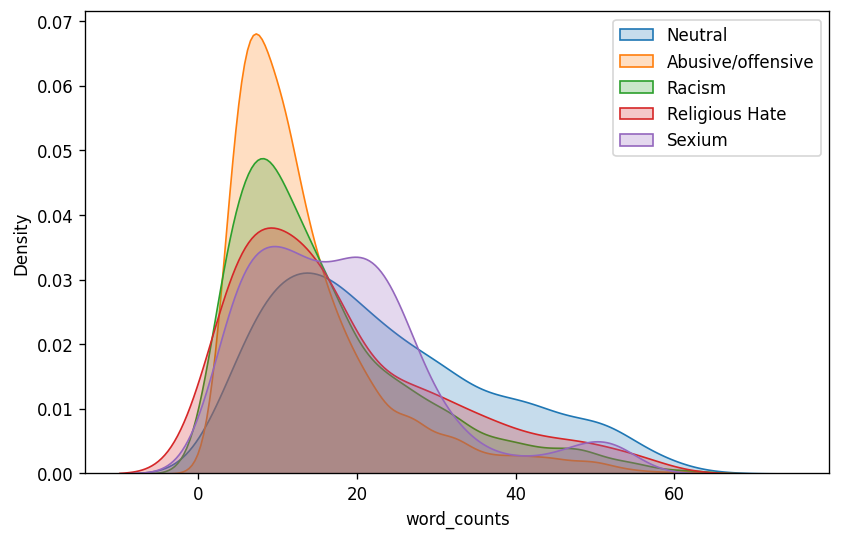

In [ ]:
sns.kdeplot(df_for_eda[df_for_eda['Label']==1]['word_counts'],label='Neutral',shade=True)
sns.kdeplot(df_for_eda[df_for_eda['Label']==0]['word_counts'],label='Abusive/offensive',shade=True)
sns.kdeplot(df_for_eda[df_for_eda['Label']==2]['word_counts'],label='Racism',shade=True)
sns.kdeplot(df_for_eda[df_for_eda['Label']==3]['word_counts'],label='Religious Hate',shade=True)
sns.kdeplot(df_for_eda[df_for_eda['Label']==4]['word_counts'],label='Sexium',shade=True)

plt.legend()
plt.show()

Data Preprocessing (Cleaning and Removing StopWords)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Removing stop words from The Data

In [ ]:
!pip install gensim
stopwords_roman_urdu = { "roman_urdu_stop_words":
    [
        "ai", "ayi", "hy", "hai", "main", "ki", "tha", "koi", "ko", "sy", "woh",
        "bhi", "aur", "wo", "yeh", "rha", "hota", "ho", "ga", "ka", "le", "lye",
        "kr", "kar", "lye", "liye", "hotay", "waisay", "gya", "gaya", "kch", "ab",
        "thy", "thay", "houn", "hain", "han", "to", "is", "hi", "jo", "kya", "thi",
        "se", "pe", "phr", "wala", "waisay", "us", "na", "ny", "hun", "rha", "raha",
        "ja", "rahay", "abi", "uski", "ne", "haan", "acha", "nai", "sent", "photo",
        "you", "kafi", "gai", "rhy", "kuch", "jata", "aye", "ya", "dono", "hoa",
        "aese", "de", "wohi", "jati", "jb", "krta", "lg", "rahi", "hui", "karna",
        "krna", "gi", "hova", "yehi", "jana", "jye", "chal", "mil", "tu", "hum", "par",
        "hay", "kis", "sb", "gy", "dain", "krny", "tou"
    ]
}

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 16.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0;

In [ ]:
ls_stopwords = stopwords_roman_urdu['roman_urdu_stop_words']


In [ ]:
!pip uninstall -y gensim numpy
!pip install gensim

Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


In [ ]:
# Import STOPWORDS from gensim
from gensim.parsing.preprocessing import STOPWORDS
from nltk.tokenize import word_tokenize

all_stopwords_gensim = STOPWORDS.union(set(ls_stopwords))

def remove_stop_words(text):
  text_tokens = word_tokenize(text)
  tokens_without_sw = [word for word in text_tokens if not word in all_stopwords_gensim]
  tokens_without_sw = ' '.join(tokens_without_sw)
  return tokens_without_sw

Removing stopwords from the tweets

In [ ]:

import nltk
nltk.download('punkt_tab')

df_for_eda['clean_tweet'] = df_for_eda['Tweet_Text'].apply(lambda x: remove_stop_words(x))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Cleaning of the tweet data from unwanted strings

In [ ]:
df_for_eda['clean_tweet'] = df_for_eda['clean_tweet'].apply(lambda x: get_clean(x))

In [ ]:
df_for_eda.head(110000)

,Tweet_Text,Label,Emoji,char_counts,word_counts,avg_wordlength,hashtag_counts,mentions_counts,digits_counts,clean_tweet
0,kah kay yih sach hai,0,U+1F600,16,5,3.200000,0,0,0,kah kay yih sach
1,neither bhadwaa tantra rather madarjaat log sh...,0,U+1F600,83,15,5.533333,0,0,0,bhadwaa tantra madarjaat log shikhandi kay pii...
2,kyoon okay yih kuchh logo ki fitrat hai,0,U+1F600,32,8,4.000000,0,0,0,kyoon okay yih kuchh logo fitrat
3,lagta hsi man chaaha job naey day rahay bhaai ko,0,U+1F600,39,10,3.900000,0,0,0,lagta hsi man chaaha job naey day bhaai
4,achchha na bataao mujhay pata hai,0,U+1F600,28,6,4.666667,0,0,0,achchha bataao mujhay pata
...,...,...,...,...,...,...,...,...,...,...
10667,hope sort male society discrimination mullah h...,4,NaN,111,18,6.166667,0,0,0,hope sort male society discrimination mullah h...
10668,ahmadiya are also citizen without right,4,NaN,34,6,5.666667,0,0,0,ahmadiya citizen right
10669,dear marathon relation discussion ahmedis know...,4,NaN,173,28,6.178571,0,0,0,dear marathon relation discussion ahmedis know...
10670,halala ki paedaaish andha hai buddddhay dikh n...,4,NaN,75,17,4.411765,0,0,0,halala paedaaish andha buddddhay dikh naheen y...


In [ ]:
def get_value_counts(df, col):
	text = ' '.join(df[col])
	text = text.split()
	freq = pd.Series(text).value_counts()
	return freq

In [ ]:
frequency_of_words = get_value_counts(df_for_eda,'clean_tweet')

In [ ]:
top20_words = frequency_of_words[:20]

<BarContainer object of 20 artists>

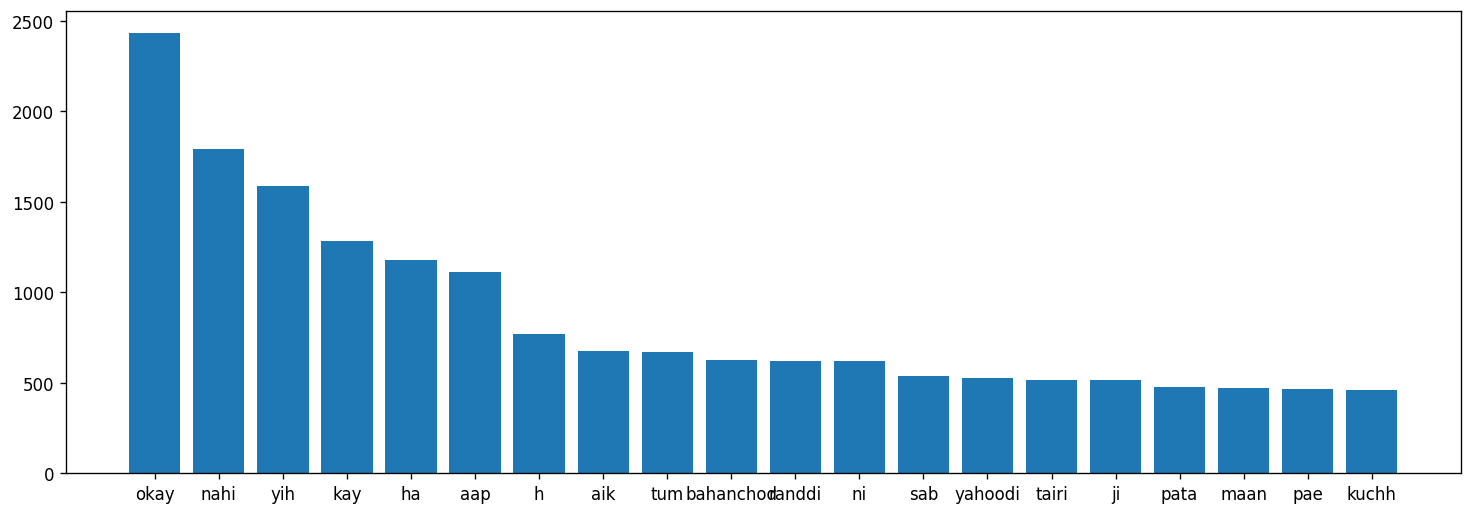

In [ ]:
plt.rcParams['figure.figsize'] = [15,5]
# Change top50_words to top20_words to match the defined variable
plt.bar(top20_words.index,top20_words.values)

In [ ]:
Least20_words = frequency_of_words[-20:]

<BarContainer object of 20 artists>

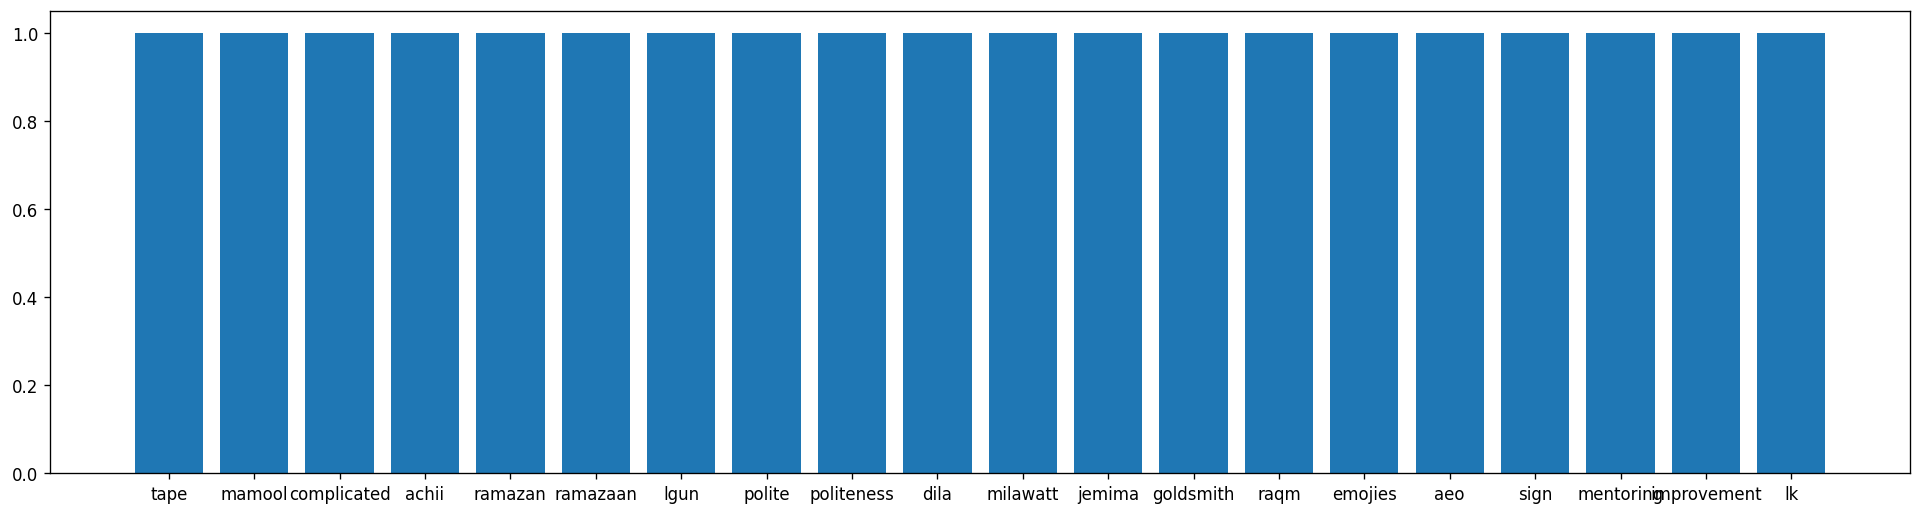

In [ ]:
plt.rcParams['figure.figsize'] = [20,5]
plt.bar(Least20_words.index,Least20_words.values)

Word Cloud

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:

abusive_tweets = get_value_counts(df_for_eda[df_for_eda['Label']==0],'clean_tweet')
abusive_tweets = ' '.join(abusive_tweets.index)

In [ ]:
wordcloud_abusive = WordCloud(width = 800, height = 800,
                background_color ='black',
                max_font_size = 100).generate(abusive_tweets)

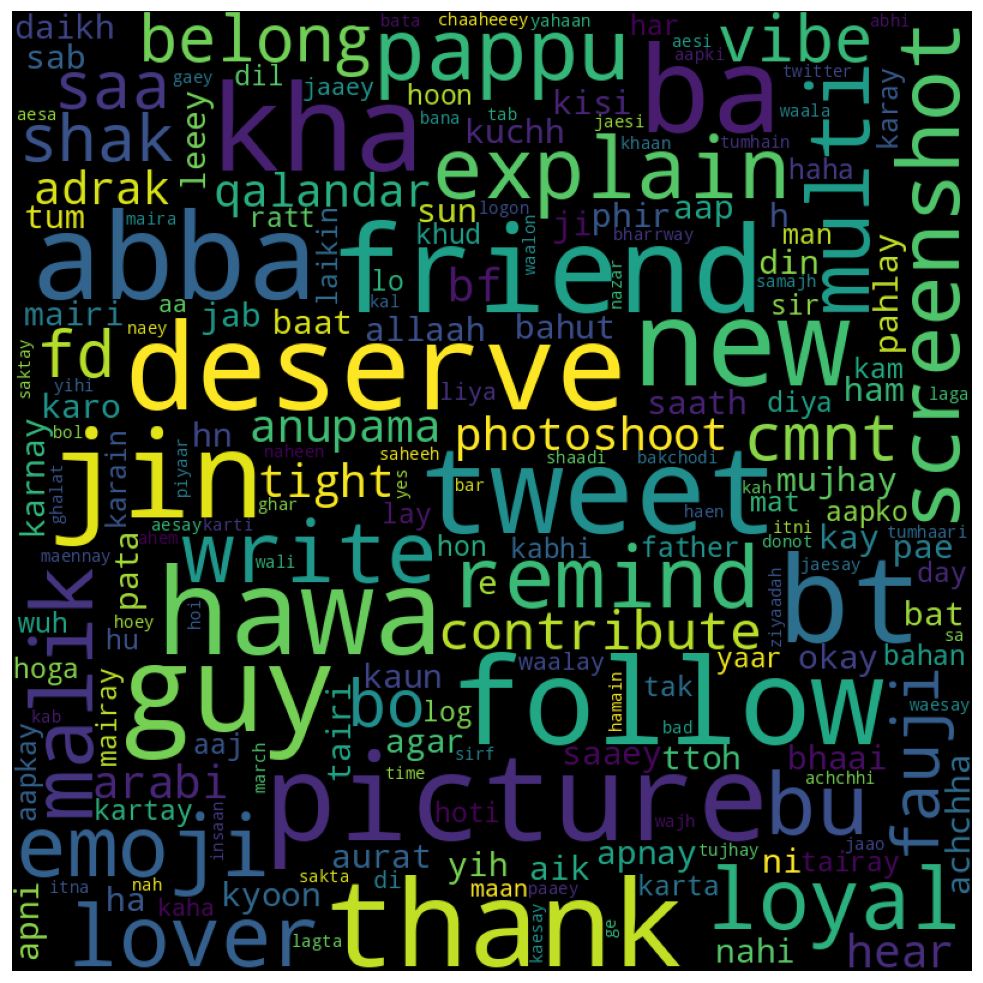

In [ ]:

# plot the WordCloud image
plt.figure(figsize = (15, 8), facecolor = None)
plt.imshow(wordcloud_abusive)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
neutral_tweets = get_value_counts(df_for_eda[df_for_eda['Label']==1],'clean_tweet')
neutral_tweets = ' '.join(neutral_tweets.index)

In [ ]:
wordcloud_neutral = WordCloud(width = 800, height = 800,
                background_color ='black',
                max_font_size = 100).generate(neutral_tweets)

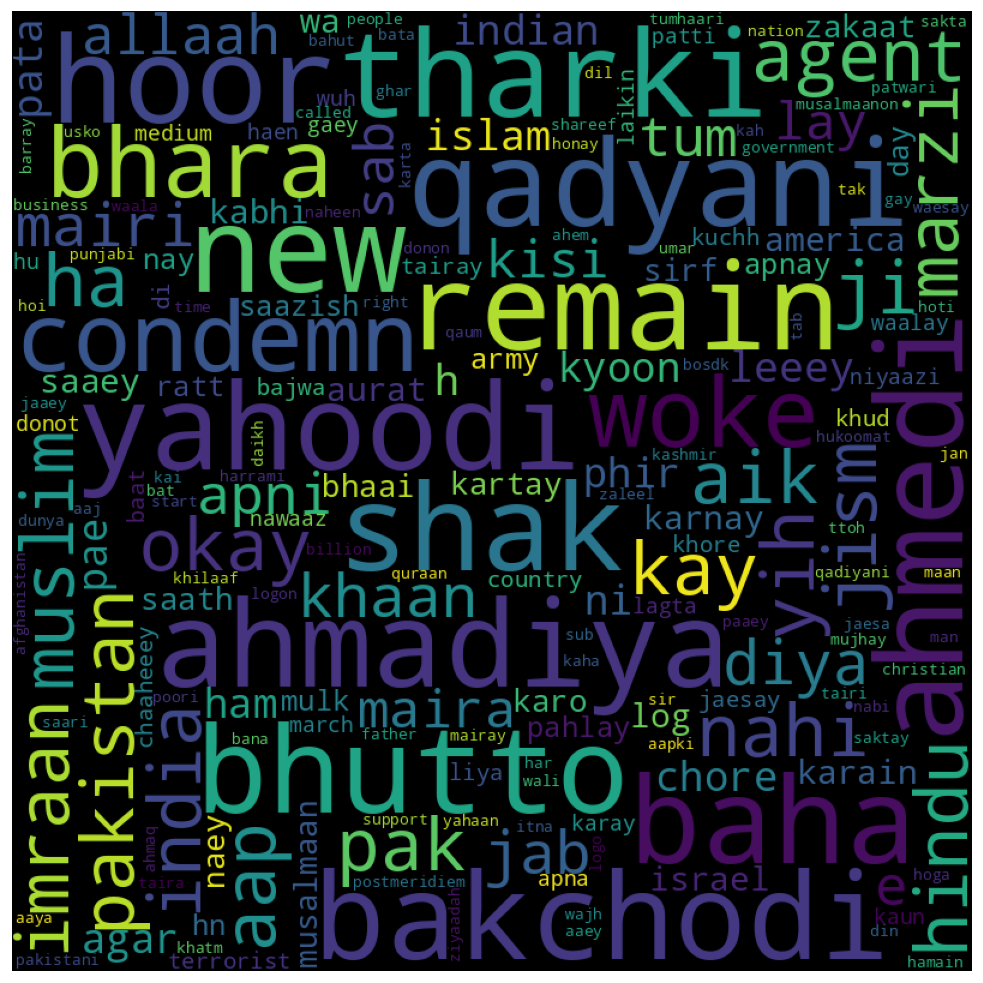

In [ ]:
# plot the WordCloud image
plt.figure(figsize = (15, 8), facecolor = None)
plt.imshow(wordcloud_neutral)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Saving Cleaned and Preprocessed Data

In [ ]:
df_for_eda.to_csv("/content/Multi_Labeled_Data.csv")


Model Building

In [ ]:
df_for_eda.head(11000)

,Tweet_Text,Label,Emoji,char_counts,word_counts,avg_wordlength,hashtag_counts,mentions_counts,digits_counts,clean_tweet
0,kah kay yih sach hai,0,U+1F600,16,5,3.200000,0,0,0,kah kay yih sach
1,neither bhadwaa tantra rather madarjaat log sh...,0,U+1F600,83,15,5.533333,0,0,0,bhadwaa tantra madarjaat log shikhandi kay pii...
2,kyoon okay yih kuchh logo ki fitrat hai,0,U+1F600,32,8,4.000000,0,0,0,kyoon okay yih kuchh logo fitrat
3,lagta hsi man chaaha job naey day rahay bhaai ko,0,U+1F600,39,10,3.900000,0,0,0,lagta hsi man chaaha job naey day bhaai
4,achchha na bataao mujhay pata hai,0,U+1F600,28,6,4.666667,0,0,0,achchha bataao mujhay pata
...,...,...,...,...,...,...,...,...,...,...
10667,hope sort male society discrimination mullah h...,4,NaN,111,18,6.166667,0,0,0,hope sort male society discrimination mullah h...
10668,ahmadiya are also citizen without right,4,NaN,34,6,5.666667,0,0,0,ahmadiya citizen right
10669,dear marathon relation discussion ahmedis know...,4,NaN,173,28,6.178571,0,0,0,dear marathon relation discussion ahmedis know...
10670,halala ki paedaaish andha hai buddddhay dikh n...,4,NaN,75,17,4.411765,0,0,0,halala paedaaish andha buddddhay dikh naheen y...


In [ ]:
text = df_for_eda['clean_tweet']
y = df_for_eda['Label']

**Machine Learning**

**Tf-IDF Vectorization**

As machine learnng algorithms only works on numeric data and we have to convert our data into vectors so i am converting the data into numeric vectors using TF IDF vectors




--- Logistic Regression ---
Classification Report
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1514
           1       0.90      0.54      0.67       181
           2       0.97      0.86      0.91       785
           3       0.98      0.41      0.58       100
           4       0.93      0.43      0.59        88

    accuracy                           0.89      2668
   macro avg       0.92      0.65      0.73      2668
weighted avg       0.90      0.89      0.88      2668


--- Multinomial Naive Bayes ---
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.99      0.85      1514
           1       1.00      0.07      0.13       181
           2       0.83      0.68      0.75       785
           3       1.00      0.02      0.04       100
           4       1.00      0.05      0.09        88

    accuracy                           0.77      2668
   macro avg       0.91  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


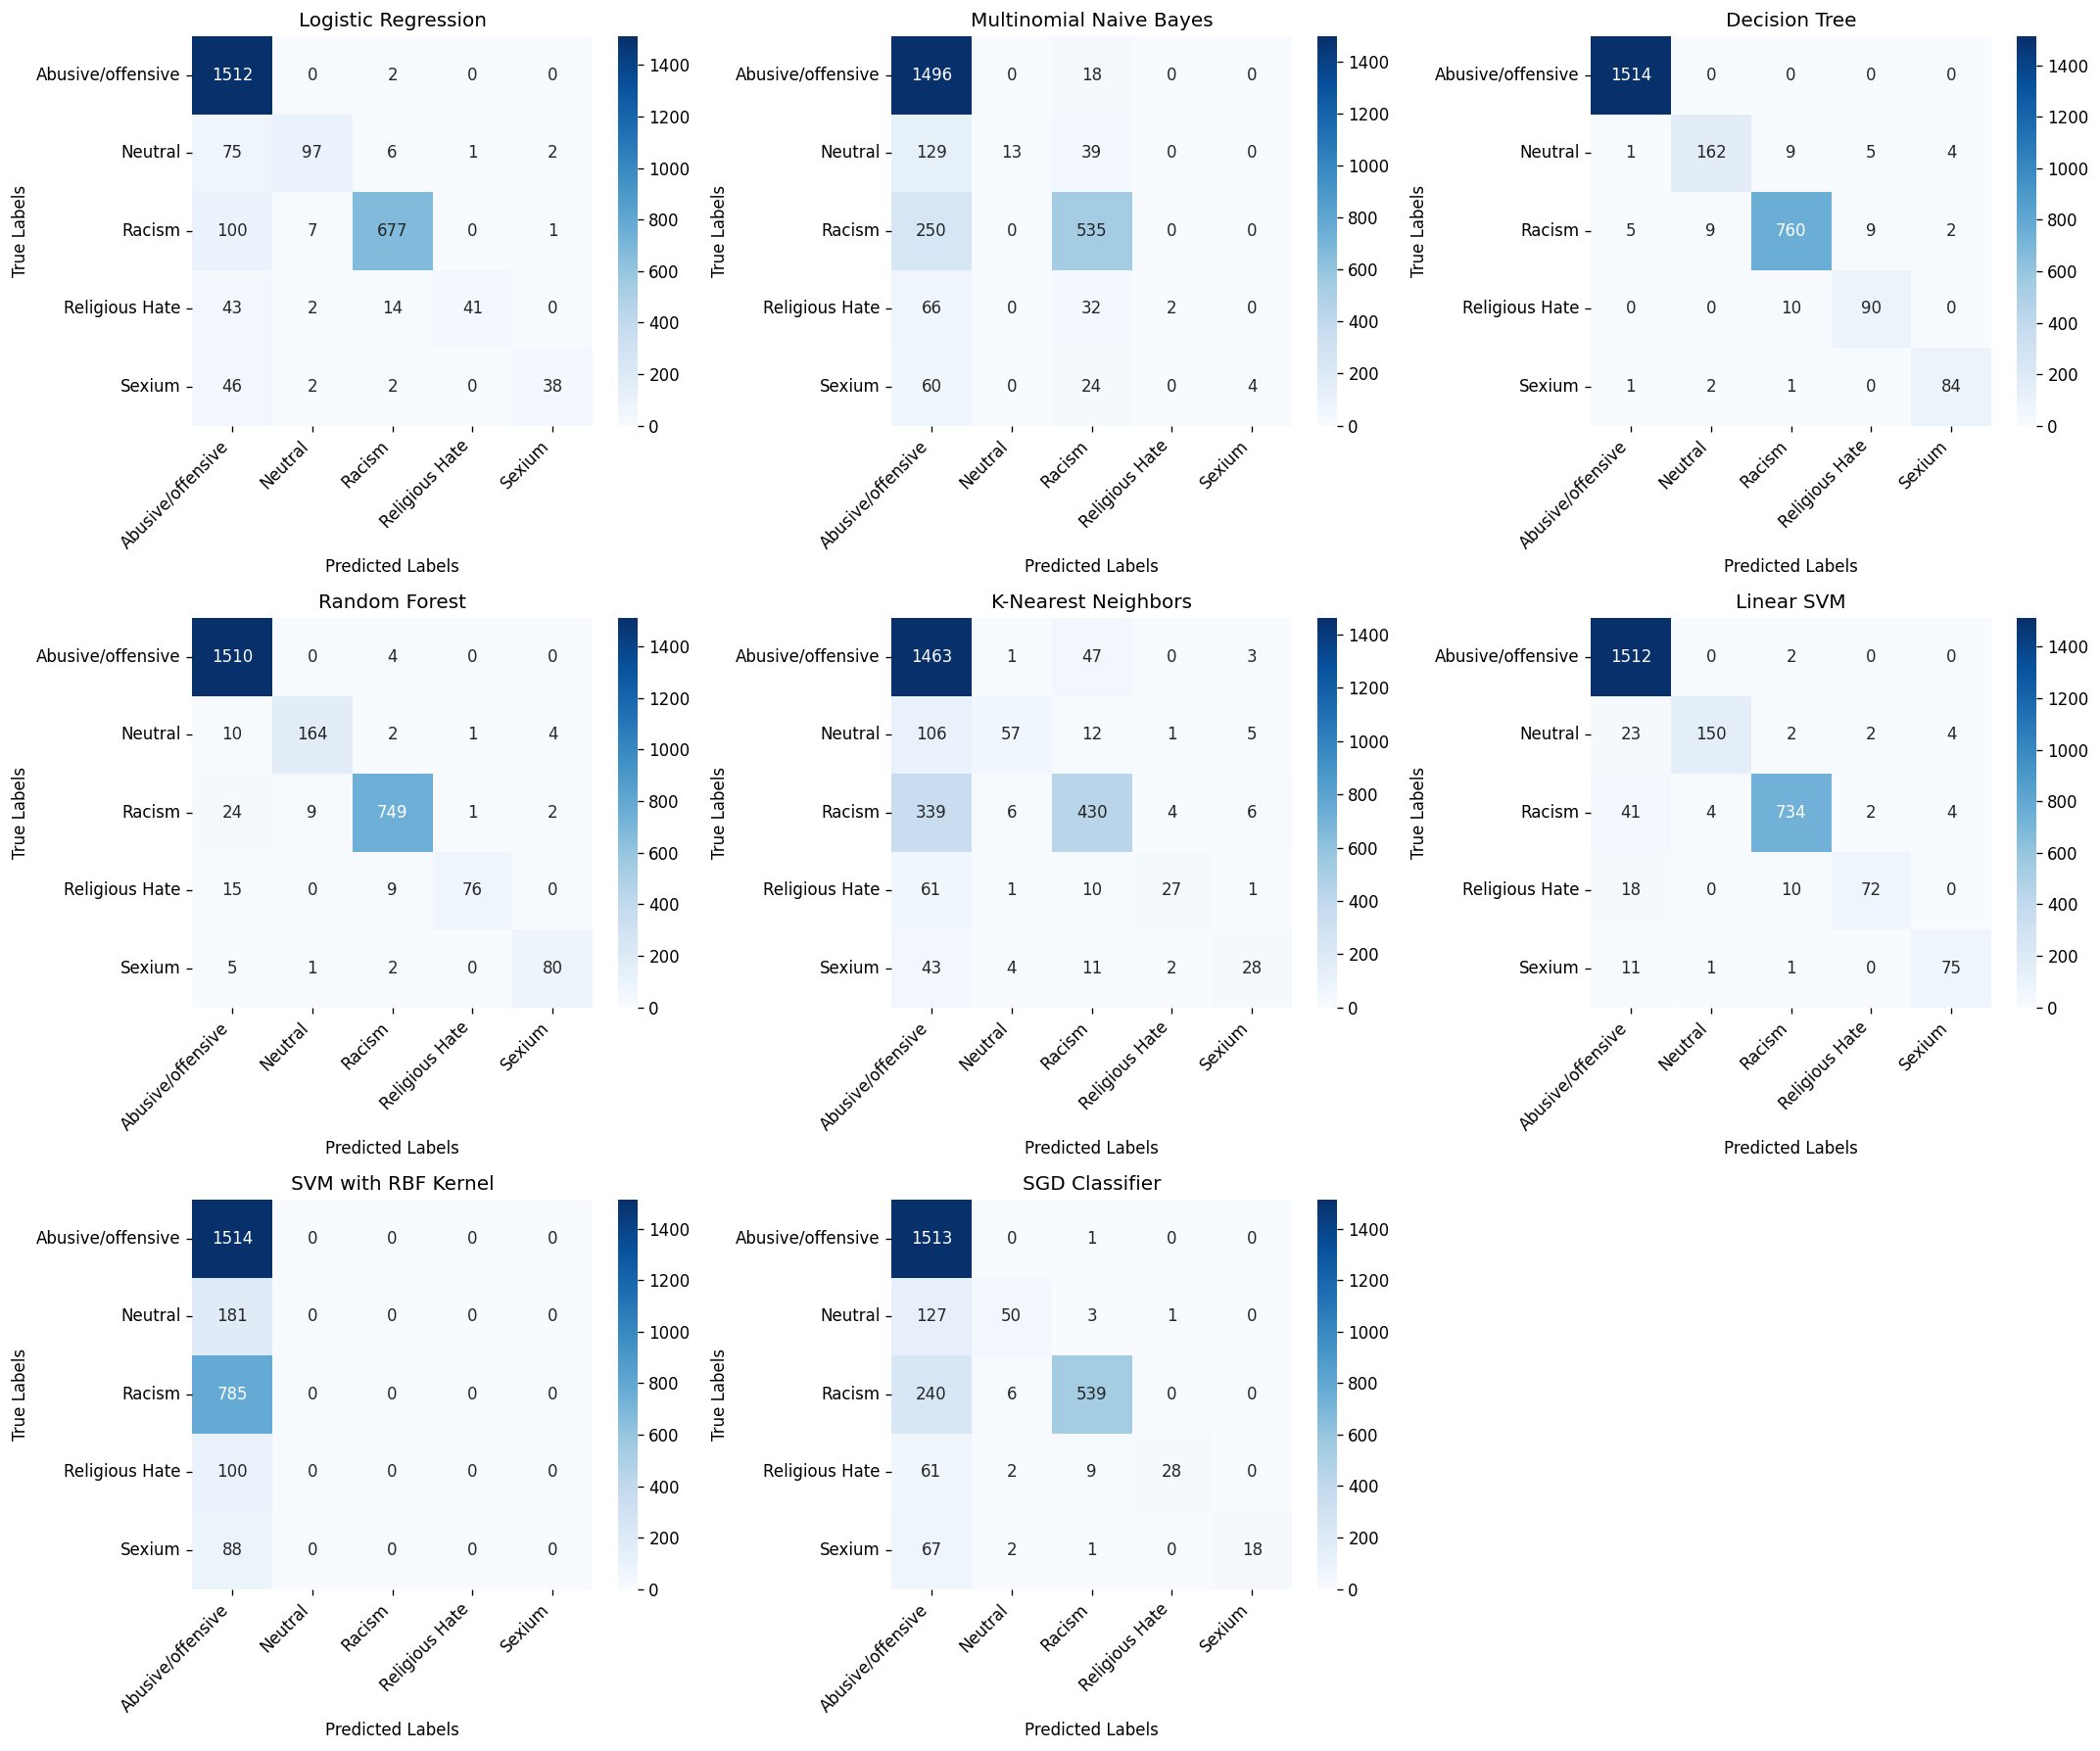

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# TF-IDF Vectorization
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(text)  # Assume `text` and `y` are already defined

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

# Store confusion matrices for all models
confusion_matrices = {}
label_map = {0: 'Abusive/offensive', 1: 'Neutral', 2: 'Racism', 3: 'Religious Hate', 4: 'Sexium'}

# Universal function
def run_classifier(clf, model_name):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n--- {model_name} ---")
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    confusion_matrices[model_name] = confusion_matrix(y_test, y_pred)

# List of classifiers
models = [
    (LogisticRegression(max_iter=1000), "Logistic Regression"),
    (MultinomialNB(), "Multinomial Naive Bayes"),
    (DecisionTreeClassifier(random_state=0), "Decision Tree"),
    (RandomForestClassifier(random_state=0), "Random Forest"),
    (KNeighborsClassifier(n_neighbors=5), "K-Nearest Neighbors"),
    (svm.LinearSVC(), "Linear SVM"),
    (SVC(gamma='auto'), "SVM with RBF Kernel"),
    (SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None), "SGD Classifier")
]

# Run all models
for clf, name in models:
    run_classifier(clf, name)

# Plot all confusion matrices in a grid
n_models = len(confusion_matrices)
cols = 3
rows = (n_models + cols - 1) // cols

plt.figure(figsize=(18, 5 * rows))
for i, (model_name, cm) in enumerate(confusion_matrices.items()):
    ax = plt.subplot(rows, cols, i + 1)
    sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')
    ax.set_title(f"{model_name}")
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    tick_labels = [label_map.get(label, str(label)) for label in sorted(y_test.unique())]
    ax.set_xticks([i + 0.5 for i in range(len(tick_labels))])
    ax.set_yticks([i + 0.5 for i in range(len(tick_labels))])
    ax.set_xticklabels(tick_labels, rotation=45, ha='right')
    ax.set_yticklabels(tick_labels, rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(text)

In [ ]:
X.shape

(10672, 15883)

In [ ]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 111983 stored elements and shape (10672, 15883)>

**Train Test dataset splitting**

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0,stratify=y)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def run_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)

  print("Classification Report")
  print(classification_report(y_test,y_pred))

  print("Confusion Matrix")
  plt.rcParams['figure.figsize'] = [8,5]

  cm = confusion_matrix(y_test,y_pred)
  print(cm)
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
  ax.set_title('Confusion Matrix');
  # Explicitly set the tick locations to match the binary labels
  ax.xaxis.set_ticks([0.5, 1.5]) # Adjust ticks to be centered between heatmap cells for a 2x2 matrix
  ax.yaxis.set_ticks([0.5, 1.5]) # Adjust ticks to be centered between heatmap cells for a 2x2 matrix
  ax.xaxis.set_ticklabels(['Bullying', 'Neutral']);
  ax.yaxis.set_ticklabels(['Non Bullying', 'Neutral']);
  plt.show() # Add plt.show() to display the plot

In [ ]:

def check_custom_user_input(x,clf):
  custom_x = remove_stop_words(x)
  custom_x = get_clean(custom_x)
  result = clf.predict(tfidf.transform([custom_x]))
  if result == 0:
    contenct_is = "Abusive/Offensive"
  else:
    contenct_is = "Normal/Neutral"
  print(f"Tweet: {x}\nPredicted Label:{contenct_is}")

Linear SVM with TF-IDF

In [ ]:
from sklearn import svm

In [ ]:
lin_clf = svm.LinearSVC()

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1514
           1       0.97      0.83      0.89       181
           2       0.98      0.94      0.96       785
           3       0.95      0.72      0.82       100
           4       0.90      0.85      0.88        88

    accuracy                           0.95      2668
   macro avg       0.95      0.87      0.90      2668
weighted avg       0.95      0.95      0.95      2668

Confusion Matrix
[[1512    0    2    0    0]
 [  23  150    2    2    4]
 [  41    4  734    2    4]
 [  18    0   10   72    0]
 [  11    1    1    0   75]]


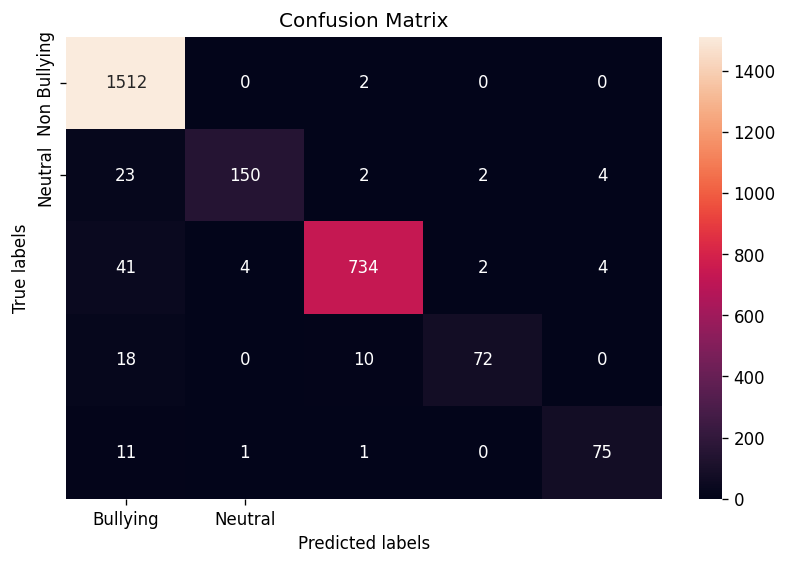

In [ ]:
run_classifier(lin_clf,X_train,y_train,X_test,y_test)

Prediction on Custom Data

In [ ]:
# Non Abusive tweet
x = "yr sahe baat b kr leta hai banda"
check_custom_user_input(x,lin_clf)

Tweet: yr sahe baat b kr leta hai banda
Predicted Label:Abusive/Offensive


In [ ]:
# Non Abusive tweet
x = "Chutiye samaj rahay ho kia"
check_custom_user_input(x,lin_clf)

Tweet: Chutiye samaj rahay ho kia
Predicted Label:Abusive/Offensive
